# Fundamentos de ciencia de datos utilizando el paquete scikit-Learn

Al desarrollar un proyecto de analítica de datos, queremos estudiar la existencia de relaciones entre variable. Por ejemplo, si tenemos una base de datos de estudiantes de una universidad, nos podría interesar encontrar alguna relación entre el promedio académico del estudiante y variables como la calidad del colegio donde estudió, si esta realizando doble programa, la cantidad de actividades extracurriculares que tiene, etc. Para esto, utilizamos modelos que nos permitan entender las relaciones que existen entre las variables estudiadas y predecir el comportamiento que tendrá una variable específica dependiendo del valor de las otras variables del sistema.

En este tutorial establecemos nociones fundamentales sobre el uso de la librería scikit-learn (`sklearn`) para integrarlas en procesos de análisis de datos.

## Requisitos

Para desarrollar este tutorial necesitarás: 
* Declarar y manipular objetos de tipo `DataFrame` en `pandas`.
* Crear visualizaciones en `matplotlib` y `seaborn`.

## Objetivos

Al final de este tutorial podrás:

**1.** Diferenciar los tipos de modelos de *machine learning* que ofrece el paquete scikit-learn y sus casos de uso comunes.<br>
**2.** Construir, entrenar y analizar los resultados de modelos básicos de *machine learning* en el paquete scikit-learn.

## 1. Modelos de *machine learning*

El propósito de los modelos de *machine learning* es encontrar características en datos conocidos (del pasado), ya sea para comprender algún fenómeno o para hacer alguna estimación sobre datos nuevos (del futuro). En cualquier caso, estos modelos son "entrenados" con base en datos observados.

Los modelos de *machine learning* comúnmente se clasifican en dos categorias: supervisados, los cuales cuentan con una variable de respuesta que se quiere predecir; no supervisados, los cuales se enfocan en encontrar relaciones subyacentes entre los datos sin necesidad de una variable de respuesta. Por ejemplo, si tenemos imágenes médicas acompañadas del diagnóstico de un profesional, quien indica si existe una patología o no, podriamos plantear un modelo de aprendizaje supervisado. Si clasificamos las observaciones en estas dos categorías (patología, no patología), podemos utilizarlas para "entrenar" nuestro modelo y posteriormente determinar, sin la ayuda del médico, si nuevas imágenes corresponden a la patología o no. La siguiente imagen ilustra la taxonomía de los modelos de *machine larning*.

![taxo.png](Archivos/taxo.png)

El aprendizaje supervisado nos permite abordar dos tipos de problemas: regresión y clasificación. En los problemas de regresión el objetivo es predecir una variable de respuesta que toma valores continuos (p.ej., estimar el precio de una casa con base en sus características), mientras que en los problemas de clasificación el objetivo es predecir una variable de respuesta que toma valores discretos (p.ej., estimar si una imagen corresponde a un objeto u otro).

El aprendizaje no supervisado nos permite abordar dos tipos de problemas: clustering y reducción de dimensionalidad. En los problemas de clustering el objetivo es encontrar conjuntos de observaciones con características similares que podrían pertenecer a una misma clase o grupo. En los problemas de reducción de dimensionalidad el objetivo es encontrar las características que representan la información relevante de un conjunto de datos de la manera más concisa.

### 1.1. Pasos típicos para desarrollar un modelo en el paquete scikit-learn

Scikit-learn (`sklearn`) es un paquete que provee implementaciones eficientes de muchos algoritmos comunes de *machine learning* con una API (interfaz de programación de aplicaciones) sencilla de utilizar. En general, llevamos a cabo los siguientes pasos al momento de crear un modelo:

**1. Importar un módulo del paquete `sklearn` que contiene el modelo que vamos a utilizar:** por ejemplo, si queremos desarrollar un modelo de regresión lineal, debemos importar el módulo correspondiente: `linear_model`.

```python
from sklearn import linear_model
```

**2. Elegir los datos que queremos analizar:** en general, podemos pensar en los datos de entrada de un modelo de *machine learning* como una matriz, que llamaremos $X$, con $m$ filas y $n$ columnas, donde $m$ corresponde al número de muestras u observaciones (*samples*) y $n$ corresponde al número de variables o características (*features*). En el caso de modelos no supervisados, esa matriz será suficiente. Para un modelo supervisado, requerimos una columna adicional de datos, $y$ (con $m$ filas, una por muestra), correspondientes a la variable de respuesta. Supongamos que contamos con un `DataFrame` (`df`) en el que las columnas 0 a 4 son variables independientes (*features*) y la columna 5 es la variable de respuesta. La selección de datos para la regresión será:

```python
X = df.iloc[:,:5]
y = df.iloc[:,5]
```

**3. Crear conjuntos de datos para entrenamiento y prueba:** luego de dividir los datos en $X$ y en $y$, debemos crear un conjunto de datos de entrenamiento, con el cual se entrenará el modelo, y un conjunto de datos de prueba, con el cual se verificará la efectividad del modelo. Es fundamental llevar a cabo este paso ya que, de lo contrario, estaríamos entrenando y probando al modelo con el mismo set de datos, lo cual no nos permitiría saber si el modelo funciona correctamente o si simplemente se “aprendió” los resultados óptimos. Una analogía útil al momento de pensar en esta situación es la de un profesor que le muestra las respuestas de un parcial a sus estudiantes y luego los evalúa con las mismas preguntas. Normalmente utilizamos el 80% de los datos para entrenar el modelo y el 20% para probarlo.

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

**4. Declarar una instancia del modelo:** cada módulo dispone de diversos modelos. Por ejemplo, dentro de `linear_model` podemos encontrar la clase `LinearRegression`, que contiene los elementos necesarios para desarrollar un modelo de regresión lineal. Para proceder, debemos declarar un objeto de la clase `LinearRegression` como se muestra a continuación.

```python
mi_modelo = linear_model.LinearRegression()
```

**5. Entrenar el modelo:** el objeto `mi_modelo` cuenta con los métodos y atributos necesarios para desarrollar un modelo de regresión. El método más común en los modelos de *machine learning* es `fit`, pues es el encargado de entrenar el modelo de acuerdo a los datos suministrados para encontrar los parámetros que mejor se ajustan. A contiuación vemos la instrucción para entrenar el modelo:

```python
mi_modelo.fit(X_train,y_train)
```

**6. Consultar los resultados del modelo:** en el caso del modelo de regresión lineal, nos interesa conocer los coeficientes que acompañan a cada una de las variables del modelo. Cuando ejecutamos el método `fit`, estos valores son almacenados en el atributo `coef_`; el caracter ( _ ) es una convención para los atributos calculados internamente por el método `fit`. Así, podemos consultar estos valores de la siguiente manera:

```python
print(mi_modelo.coef_)
```

**7. Utilizar el modelo para predecir:** por lo general, queremos aplicar nuestro modelo entrenado a nuevas observaciones de datos. Para esto utilizamos el método `predict`, que recibe por parámetro las columnas correspondientes a variables independientes ($X$) y genera las predicciones correspondientes para la variable de respuesta ($y$). A continuación, utilizamos los datos de prueba (`X_test`) para predecir la variable de respuesta.

```python
y_estimado = mi_modelo.predict(X_test)
```

**8. Evaluar el desempeño del modelo:** es importante asegurarnos que el modelo que hemos entrenado se desempeña bien con datos nuevos y no se ha sobreajustado con los datos de entrenamiento. En este caso, lo usual es medir qué tan cercanas son las predicciones hechas por el modelo (`y_estimado`) a los valores reales de la variable de respuesta de los datos de prueba (`y_test`). En el caso de la regresión lineal, una métrica común es el $R^2$, el cual puede ser calculado con el método `r2_score` del módulo `sklearn.metrics`. Procedemos a importar la funcion y estimar la métrica:

```python
from sklearn.metrics import r2_score
mi_r2 = r2_score(y_test, y_estimado)
```

También podemos usar el método `score` para conocer la precisión del modelo a partir de los datos de prueba:

```python
mi_r2 = mi_modelo.score(X_test, y_test)
```

## 2. Modelos de regresión

Un modelo de regresión es un modelo matemático que busca determinar la relación de una variable dependiente $Y$ con respecto a una o más variables independientes $X$. Para ello debemos postular una ecuación que relacione estas variables. Por ejemplo, queremos saber si el rendimiento de un producto químico está relacionado con su temperatura. Podemos construir un modelo de regresión para identificar la relación que existe entre las variables y predecir el rendimiento de un producto dada una temperatura.

Veremos tres tipos de modelos de regresión:
1.	Regresión lineal simple
2.	Regresión múltiple
3.	Regresión logística

En este tutorial veremos cómo implementar estos modelos en el contexto de analítica de datos sin explicar su trasfondo estadístico, veremos esta explicación en otros cursos de la Maestría.

### 2.1. Regresión lineal simple

Una regresión lineal simple se basa en una sola variable independiente $X$, una variable dependiente $y$ y supone que existe una relación lineal entre estas. La ecuación general para este tipo de regresión es la siguiente:

$$y = β_0 + β_1X + e$$

+ $β_0$ es la altura a la que la recta corta al eje Y, la cual se denomina término independiente.

+ $β_1$ es el incremento que se produce en la variable $y$ cuando la variable $X$ aumenta una unidad, el cual se denomina pendiente de la recta.

#### Ejemplo 1

En este ejemplo utilizaremos los datos de incidencia de diabetes y seguiremos los pasos vistos anteriormente para llevar a cabo una regresión lineal que nos permita identificar la relación entre el _BMI_ de un paciente y el progreso de la enfermedad luego de un año de tomados los datos.

Empecemos cargando los datos y filtrando la información relevante:

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Importamos los datos
data_diabetes = datasets.load_diabetes(as_frame=True)

# Asignamos a las columnas nombres según el diccionario de los datos originales
nuevos_nombres = {"bmi": "body_mass_index",
                  "bp": "blood_pressure",
                  "s1": "total_serum_cholesterol",
                  "s2": "low_density_lipoproteins",
                  "s3": "high_density_lipoproteins",
                  "s4": "total_cholesterol",
                  "s5": "log_serum_triglycerides",
                  "s6": "blood_sugar_level"}

data_diabetes.data = data_diabetes.data.rename(nuevos_nombres, axis='columns')

# Creamos un DataFrame para visualizarlos
data_diabetes.data

,age,sex,body_mass_index,blood_pressure,total_serum_cholesterol,low_density_lipoproteins,high_density_lipoproteins,total_cholesterol,log_serum_triglycerides,blood_sugar_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
# Elegimos los datos que queremos analizar

# Definimos la variable independiente (BMI)
X = data_diabetes.data[["body_mass_index"]]

# Definimos e imprimimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_diabetes.target
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Ahora, visualicemos los datos para darnos una idea de si existe una relación lineal entre las variables.

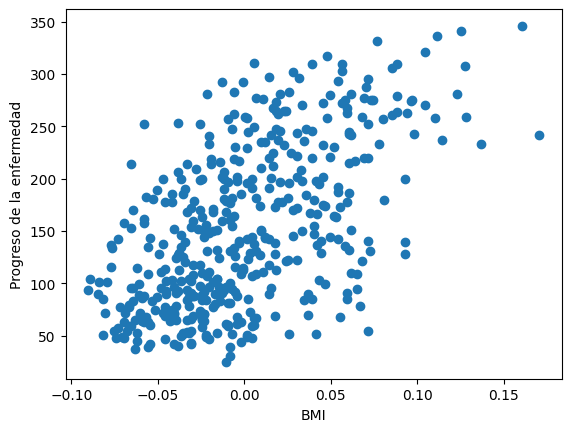

In [4]:
# Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('BMI')
plt.ylabel('Progreso de la enfermedad')
plt.show()

Después, creamos el modelo de regresión siguiendo los pasos vistos anteriormente:

In [5]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_test

,body_mass_index
155,0.060618
441,-0.073030
219,-0.041774
58,-0.064408
139,0.061696
...,...
227,-0.029918
133,-0.053630
275,-0.011595
384,-0.029918


In [8]:
X_train

,body_mass_index
207,0.045529
49,0.014272
276,0.026128
349,-0.057941
72,-0.004050
...,...
186,0.042296
171,-0.046085
371,-0.009439
258,-0.024529


In [7]:
y_train

207    202.0
49     142.0
276    283.0
349     88.0
72     202.0
       ...  
186    137.0
171     74.0
371    197.0
258     89.0
82      52.0
Name: target, Length: 353, dtype: float64

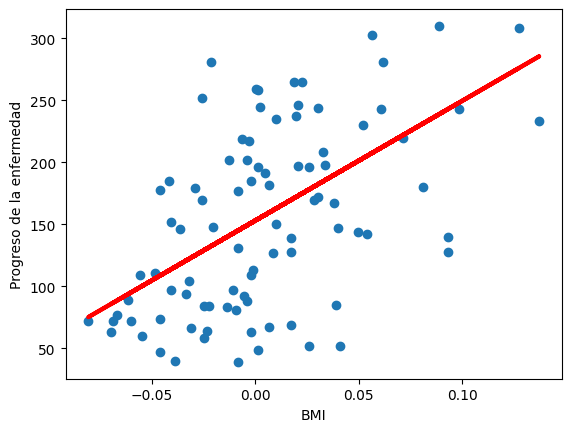

In [9]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_estimado = lr.predict(X_test)

# Graficamos los datos y las predicciones hechas por el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_estimado, color='red', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Progreso de la enfermedad')
plt.show()

Como podemos ver, parece que el modelo de regresión se ajusta bien a los datos Diabetes. Para comprobarlo, evaluemos el desempeño del modelo:

In [15]:
lr.score(X_test, y_test)

0.08157167123157316

El desempeño del modelo no es muy alto. Esto nos indica que, aunque a simple vista pareciera que el _BMI_ es suficiente para estimar el progreso de la enfermedad, es probable que necesitemos considerar más variables con el fin de encontrar una mejor aproximación.

### 2.2. Regresión lineal múltiple

Una regresión lineal múltiple es el caso de una regresión lineal simple con múltiples variables independientes: $X$. La ecuación general para este tipo de regresión es la siguiente:

$$
    y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + e.
$$

El objetivo de este tipo de regresión es incorporar la información de varias variables para explicar conjuntamente el comportamiento de la variable de respuesta.

#### Ejemplo 2.

Retomemos el Ejemplo 1. Esta vez queremos predecir el progreso de la enfermedad a partir de múltiples variables. Para esto usaremos todas las variables que existen en el set de datos diabetes. Entre estas variables encontramos la edad, el sexo, el _BMI_ y algunas más.

De este modo, empezaremos cargando el set de datos y separando la variable de interes de las otras variables:

In [10]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Importamos los datos
data_diabetes = datasets.load_diabetes(as_frame=True)

# Asignamos a las columnas nombres según el diccionario de los datos originales
nuevos_nombres = {"bmi": "body_mass_index",
                  "bp": "blood_pressure",
                  "s1": "total_serum_cholesterol",
                  "s2": "low_density_lipoproteins",
                  "s3": "high_density_lipoproteins",
                  "s4": "total_cholesterol",
                  "s5": "log_serum_triglycerides",
                  "s6": "blood_sugar_level"}

data_diabetes.data = data_diabetes.data.rename(nuevos_nombres, axis='columns')

# Elegimos los datos que queremos analizar

# Definimos todas las variables como variables independientes
X = data_diabetes.data

# Definimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_diabetes.target

Luego, debemos crear el modelo de la misma manera que en la regresión lineal simple.

In [11]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

Finalmente, evaluemos el desempeño del modelo:

In [10]:
lr.score(X_test, y_test)

0.4526027629719196

Como podemos observar, el modelo explica el progreso de la enfermedad mucho mejor que cuando solo se usó el _BMI_. Aunque en un contexto estadístico más riguroso realizariamos pruebas de hipótesis para llegar a una conclusión, llegamos a la observación de que el progreso de la enfermedad puede ser explicado conjuntamente por numerosos factores y no por el BMI en particular.

### 2.3. Regresión logística

Una regresión logística se basa en una una o varias variables independientes $X$ y una variable dependiente $y$. La variable $y$ es binaria y nos permite resolver problemas de clasificación en los cuales queremos determinar si un registro pertenece a una categoría u otra. Por ejemplo, si quisieramos determinar si una fruta es una manzana o una pera dadas sus características, podríamos usar una regresión logística para calcular la probabilidad de que esta sea una manzana o una pera.

![logistica.png](Archivos/logistica.png)

#### Ejemplos de situaciones que se pueden resolver con regresión logística: 

+ Determinar la probabilidad de que una persona reciba o no un crédito.
+ Determinar la probabilidad de que un estudiante sea admitido o no en una universidad.
+ Determinar la probabilidad de que un paciente tenga una enfermedad o no.

#### Ejemplo 3

Calculemos la probabilidad de que una persona sea admitida en una prestigiosa universidad dado su puntaje en la prueba GMAT, su promedio del pregrado y sus años de experiencia laboral. Si la persona fue admitida, la variable de respuesta la clasificará con el número 1; de lo contrario, la variable tomará el valor de 0. Comenzaremos cargando los datos.

In [13]:
import pandas as pd
datos = pd.read_excel("Archivos/datosLogistica.xlsx")
datos.head(10)

,Admitido,GMAT,Promedio,Experiencia
0,1,780,4.0,3
1,1,750,3.9,4
2,0,690,3.3,3
3,1,710,3.7,5
4,0,680,3.9,4
5,1,730,3.7,6
6,0,690,2.3,1
7,1,720,3.3,4
8,1,740,3.3,5
9,0,690,1.7,1


Después de cargar los datos debemos separar la variable de interés, es decir si fue admitido o no, del resto de las variables:

In [12]:
# Elegimos los datos que queremos analizar

# Definimos todas las variables como variables independientes
X = datos[["GMAT", "Promedio", "Experiencia"]]

# Definimos la variable de respuesta
y = datos["Admitido"]

Ahora, crearemos el modelo de regresión logística:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = LogisticRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


Finalmente, verificaremos la precisión del modelo:

In [18]:
lr.score(X_test, y_test)

1.0

Como podemos ver, el modelo acierta más del 60% de las veces, lo cual nos indica que es probable que estás variables sean pertinentes al momento de predecir si una persona ingresará a una universidad prestigiosa. Sin embargo, se deben tener en cuenta más variables en el modelo para aumentar su precisión.

## 3. Ejemplos de modelos comunes de *machine learning*

Los siguientes ejemplos corresponden a una adaptación del material del libro *Python Data Science Handbook: Essential Tools for Working with Data* de Jake VanderPlas. Son ejemplos ampliamente usados en documentación y no corresponden a implementaciones originales, salvo explicaciones agregadas.

### 3.1. Un ejemplo de clasificación para los datos Iris

#### El conjunto de datos Iris (contenido en el paquete Seaborn)

El conjunto de datos Iris contiene observaciones de diferentes especies de flores. Para cada observación, se tiene la longitud y ancho de sus sépalos, así como la longitud y ancho de sus pétalos. Adicionalmente, se cuenta con una etiqueta que representa la especie de cada flor.

In [17]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Exploración visual con Seaborn

Al pasar la columna `"species"` al parámetro `hue` del método pairplot obtenemos una visualización diferenciada con dispersiones separadas por color.

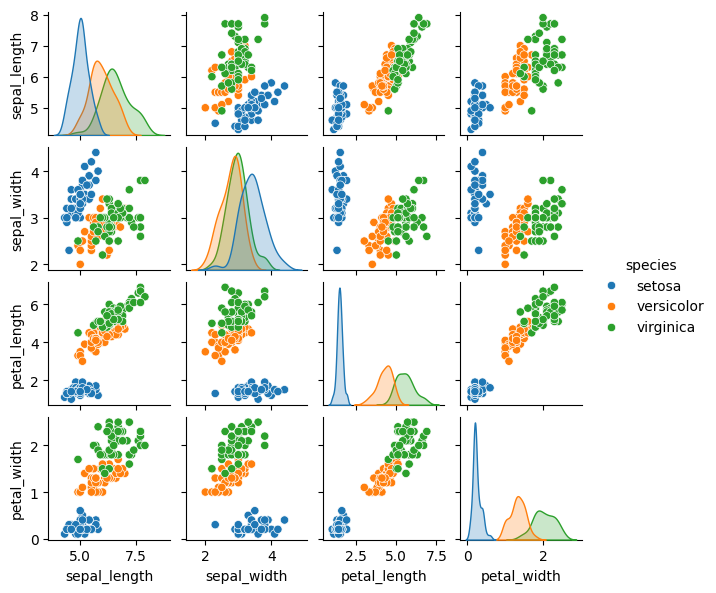

In [20]:
sns.pairplot(iris, hue='species', height=1.5)

#### Variables independientes

La longitud y ancho de sus sépalos y pétalos.

In [18]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [19]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Variable dependiente

Etiqueta que representa la especie de cada flor.

In [22]:
y_iris = iris['species']
y_iris.shape

(150,)

In [24]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### Crear el modelo de clasificación

In [25]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

Uno de los modelos más sencillos y comunes de clasificación es el *Gaussian naive Bayes classifier* y, aunque la discusión de la lógica del modelo excede el alcance de este tutorial, su implementación en el paquete scikit-learn es muy sencilla. Por esta razón, lo usaremos a manera de caja negra con el propósito de ilustrar el potencial de este paquete.

In [26]:
from sklearn.naive_bayes import GaussianNB 

# Declaramos una instancia del modelo
model = GaussianNB()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = model.predict(X_test)

Por último, evaluamos el desempeño del modelo. Recurramos al módulo `metrics` para importar la función `accuracy_score`.

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

En este caso, obtenemos un desempeño superior al 97%, el cual es sorprendentemente alto, pues en la práctica es difícil lograr tal nivel de ajuste.

### 3.2 Análisis de Componentes Principales

El análisis de componentes principales, frecuentemente usado en reducción de dimensionalidad, consiste en encontrar las direcciones en las que se encuentra la mayor variabilidad del conjunto de datos con base en sus valores y vectores propios. La discusión del método en profundidad excede el alcance de este tutorial, pero su implementación con el paquete scikit-learn es sencilla. En este caso, tenemos cuatro variables independientes y queremos reducir esas dimensiones a dos, por lo cual aplicaremos el método indicando que nos interesan dos componentes principales.

In [20]:
from sklearn.decomposition import PCA  # 1. Elegir el modelo deseado de la clase correspondiente en Scikit Learn

model = PCA(n_components=2)            # 2. Instanciar el modelo (con los hiper-parámetros deseados; 
                                       #    en este caso, queremos dos de las componentes principales)
model.fit(X_iris)                      # 3. Ajustar el modelo (basta con incluir X)
X_2D = model.transform(X_iris)         # 4. Transformar el modelo a dos dimensiones 
                                       # (se usa transformar en lugar de predecir por el tipo de modelo en cuestión)

Mediante PCA, cambiamos el espacio de variables. En lugar de expresar el problema en términos de las cuatro variables correspondientes a las medidas de los sépalos y pétalos, lo expresamos en función de dos variables auxiliares (`"PCA1"` y `"PCA2"`) que no hacen parte del conjunto de variables originales sino que responden a alguna combinación de ellas.

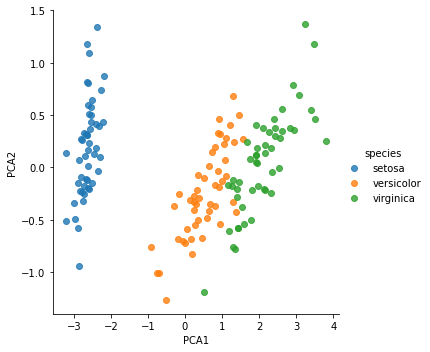

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

### 3.3 Modelo de *clustering* para Iris

Los modelos de clustering buscan encontrar grupos emergentes en el conjunto de datos. Un modelo común es el modelo de mezcla Gaussiana (GMM: Gaussian Mixture Model), el cual debe recibir como parámetro el número de *clusters* o grupos que se desean.

In [22]:
from sklearn.mixture import GaussianMixture as GMM # 1. Importar el modelo deseado a partir de la clase respectiva
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instanciar el modelo con parámetros deseados
model.fit(X_iris)                    # 3. Entrenar (no hace falta Y por ser modelo no supervisado)
y_gmm = model.predict(X_iris)        # 4. Determinar los grupos o clusters

Finalmente, nos interesa visualizar los resultados. Como el problema original está en cuatro dimensiones y no podríamos graficarlo, optamos por graficarlo en una proyección a dos variables, aprovechando que ya contábamos con una transformación a dos variables a partir del ejercicio de componentes principales.

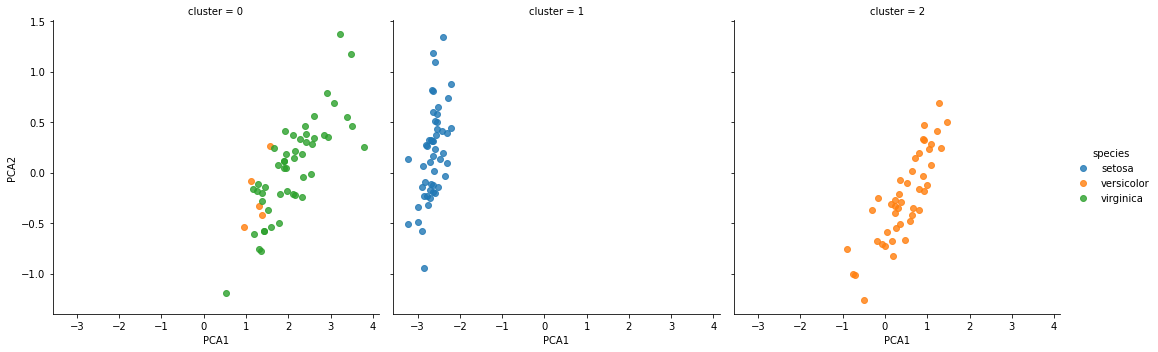

In [23]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Material adicional

* scikit-learn org. (2020). Machine Learning in Python. 2 de Diciembre de 2020, de scikit-learn Sitio web: https://scikit-learn.org/stable/

## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn Sitio web: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gomez Castro, Ariadna de Ávila, Camilo Falla Moreno, Juan David Reyes, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez

__Fecha última actualización__: 26/07/2022